In [1]:
%matplotlib inline

import pickle
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
from pprint import pprint

from sklearn import linear_model
from sklearn.feature_selection import SelectFromModel, RFE, RFECV

In [2]:
df = pd.read_table('integrated.tsv', sep='\t', index_col = 'Probe Set ID')[['NAA_mean', 'IAA_mean','p-value','NAA-IAA']]
df

,NAA_mean,IAA_mean,p-value,NAA-IAA
Probe Set ID,,,,
244901_at,-0.297300,-0.196266,0.690163,-0.101034
244902_at,-0.285224,-0.098028,0.104898,-0.187196
244903_at,0.139721,-0.072863,0.479227,0.212585
244904_at,-0.151017,0.089025,0.587896,-0.240042
244905_at,0.196231,0.546593,0.505734,-0.350362
244906_at,-0.218895,0.041834,0.345315,-0.260729
244907_at,1.882145,-0.284597,0.004945,2.166742
244908_at,-0.042960,0.012632,0.886401,-0.055592
244909_at,-0.211255,0.118293,0.383887,-0.329548


---
## OLD

In [19]:
with open('AuxRE_count.dict', 'rb') as fget:
    AuxRE_count = pickle.load(fget)

In [20]:
AuxREs = list(AuxRE_count.keys())

In [21]:
for AuxRE in AuxREs:
    df[AuxRE] = 0
    counts = AuxRE_count[AuxRE]
    for probe in counts.keys():
        df.loc[probe, AuxRE] = int(counts[probe])
df.to_csv('AuxRE_count_all.tsv', sep='\t')

In [22]:
with_AuxRE = df[df['TGTCTC']+df['TGTCGA']+df['TGTCTG']+df['TGTCGG']+df['TGTCCA']+df['TGTCAT']+df['TGTCAG']+df['TGTCGC']+df['TGTCTA']+df['TGTCAA']+df['TGTCCG']+df['TGTCGT']+df['TGTCTT']+df['TGTCCC']+df['TGTCCT']+df['TGTCAC'] > 1]
#with_AuxRE.to_csv('with_AuxRE.tsv', sep='\t')

In [23]:
for AuxRE in AuxREs:
    df[AuxRE] = 0
    counts = AuxRE_count[AuxRE]
    for probe in counts.keys():
        df.loc[probe, AuxRE] = int(bool(int(counts[probe])))

In [24]:
with_AuxRE

,NAA_mean,IAA_mean,p-value,NAA-IAA,TGTCTC,TGTCGA,TGTCTG,TGTCGG,TGTCCA,TGTCAT,TGTCAG,TGTCGC,TGTCTA,TGTCAA,TGTCCG,TGTCGT,TGTCTT,TGTCCC,TGTCCT,TGTCAC
Probe Set ID,,,,,,,,,,,,,,,,,,,,
244903_at,0.139721,-0.072863,0.479227,0.212585,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
244905_at,0.196231,0.546593,0.505734,-0.350362,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
244908_at,-0.042960,0.012632,0.886401,-0.055592,0,0,0,0,1,0,0,0,2,0,0,0,1,0,0,0
244909_at,-0.211255,0.118293,0.383887,-0.329548,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0
244910_s_at,-0.007702,0.080136,0.811766,-0.087838,0,0,0,0,0,1,0,0,2,0,0,0,1,1,1,0
244911_at,1.744381,0.544082,0.059943,1.200299,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
244912_at,-0.129032,-0.001607,0.522648,-0.127425,1,1,0,1,1,1,0,0,0,1,0,0,1,0,0,2
244913_at,-0.546820,0.309025,0.021911,-0.855846,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,1
244915_s_at,-0.210602,-0.100606,0.838542,-0.109996,0,0,0,0,2,0,1,0,1,0,0,0,0,1,0,0


In [25]:
with_AuxRE = with_AuxRE[with_AuxRE['p-value'] < 0.05]

for c in AuxREs:
    for i in with_AuxRE.index:
        with_AuxRE.loc[i, c] = int(bool(with_AuxRE.loc[i, c]))

In [26]:
to_rf = with_AuxRE.copy()
to_rf['class'] = 0
for i in with_AuxRE.index:
    if to_rf.loc[i, 'NAA-IAA'] >= 1:
        to_rf.loc[i, 'class'] = 0
    elif to_rf.loc[i, 'NAA-IAA'] >= 0.5:
        to_rf.loc[i, 'class'] = 1
    elif to_rf.loc[i, 'NAA-IAA'] >= 0:
        to_rf.loc[i, 'class'] = 2
    elif to_rf.loc[i, 'NAA-IAA'] >= -0.5:
        to_rf.loc[i, 'class'] = 3
    elif to_rf.loc[i, 'NAA-IAA'] >= -1:
        to_rf.loc[i, 'class'] = 4
    else:
        to_rf.loc[i, 'class'] = 5

In [27]:
combination = []
for i in range(16):
    first = AuxREs[i]
    for j in range(i+1, 16):
        second = AuxREs[j]
        combination.append([first, second])

In [28]:
for c in combination:
    column_name = '_'.join(c)
    to_rf[column_name] = 0
    for i in to_rf.index:
        to_rf.loc[i, column_name] = int(bool(to_rf.loc[i, c[0]]) and bool(to_rf.loc[i, c[1]]))

In [29]:
to_rf.to_csv('to_rf.tsv', sep='\t')

In [30]:
columns = list(to_rf.columns)
columns.remove('NAA_mean')
columns.remove('IAA_mean')
columns.remove('p-value')
columns.remove('NAA-IAA')
columns.remove('class')

In [31]:
estimator = linear_model.Lasso()
selector = RFE(estimator, 5, step=1)
selector = selector.fit(to_rf[columns], to_rf['NAA-IAA'])
print(selector.support_)
print('===================')
print(selector.ranking_)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
  True  True  True  True]
[132 131 130 129 128 127 126 125 124 123 122 121 120 119 118 117 116 115
 114 113 112 111 110 109 108 107 106 105 104 103 102 101 100  99  98  97
  96  95  94  93  92  91 

from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold, train_test_split,ShuffleSplit, LeaveOneOut
import numpy as np
estimator = linear_model.Lasso()
rfecv = RFECV(estimator=estimator, step=1, scoring='accuracy')
rfecv.fit(to_rf[columns], np.array(to_rf['class'], dtype=int))
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [32]:
np.array(to_rf['class'], dtype=int)

array([4, 5, 4, ..., 1, 0, 3])

In [33]:
clf2 = linear_model.Lasso().fit(to_rf[columns], to_rf['NAA-IAA'])
model = SelectFromModel(clf2, prefit=True)
to_rf_fitted = model.transform(to_rf)
print(clf2.coef_)
print(clf2.intercept_)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. -0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
-0.148574813168


/home/yijia/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


In [34]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier().fit(to_rf[columns], to_rf['class'])
print(clf_rf.feature_importances_)
print(sorted(list(clf_rf.feature_importances_)))

[ 0.03322972  0.01801398  0.01865603  0.01218716  0.02124344  0.02310056
  0.01585175  0.00823073  0.0190374   0.02609813  0.00841616  0.01793138
  0.03671336  0.01206984  0.01825267  0.01784616  0.00675844  0.00657675
  0.00639649  0.00788375  0.00770265  0.00687899  0.00579383  0.00651706
  0.00761621  0.00547281  0.00723854  0.01062604  0.00641359  0.00768857
  0.00954967  0.00589073  0.00498748  0.00643199  0.0073285   0.00464334
  0.00384335  0.00616474  0.00709161  0.00435244  0.00686485  0.00646416
  0.00517263  0.00592437  0.00528193  0.00510282  0.00635907  0.00665771
  0.00482548  0.00382583  0.0058314   0.00719385  0.00425313  0.00597578
  0.0082806   0.00536217  0.00399275  0.00653745  0.00615861  0.00409535
  0.00283071  0.00309632  0.00538336  0.00570394  0.00400473  0.00513143
  0.00615532  0.00368442  0.0042293   0.00455475  0.00605985  0.0058819
  0.00415506  0.00665152  0.00690297  0.00418897  0.00603872  0.00900258
  0.00691109  0.0073295   0.00573753  0.00530024  0.

In [35]:
sum(clf_rf.feature_importances_)

1.0000000000000004

In [45]:
from sklearn.svm import SVC

Optimal number of features : 36


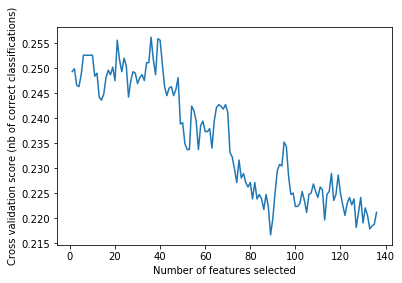

In [47]:
# Build a classification task using 3 informative features
#X, y = make_classification(n_samples=3341, n_features=25, n_informative=3,
#                          n_redundant=2, n_repeated=0, n_classes=8,
#                          n_clusters_per_class=1, random_state=0)

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(to_rf[columns], np.array(to_rf['class'], dtype=int))

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, 27), rfecv.grid_scores_[:26])
plt.show()

array([[  1.13497528e-04,   3.10001460e-04,   5.06542915e-06,
         -1.03338100e-04,  -5.71511943e-04,  -1.60132272e-04,
         -6.85384514e-05,  -1.99015200e-04,   2.21608809e-04,
         -1.17665422e-04,   6.35773189e-04,  -7.14807436e-05,
          1.93185618e-04,   7.98727219e-04,  -1.65183114e-04,
          6.23206536e-05,  -3.87339687e-04,   6.50185905e-05,
          4.04421216e-05,   3.21764328e-04,   5.57497067e-05,
         -6.51556365e-04,   2.93197055e-04,   2.46846377e-04,
         -1.02445620e-05,   8.34938307e-05,   1.60629084e-04,
          3.45791319e-04,  -1.76106075e-04,  -5.73759971e-04,
         -4.07875087e-04,   4.34270013e-04,   1.81677347e-04,
         -1.69432342e-04,  -6.86194911e-05,  -3.55257928e-04],
       [  1.30069661e-04,   2.06441840e-04,  -5.31156636e-06,
         -1.06973152e-04,  -1.76209540e-04,  -1.13286383e-04,
         -4.65160299e-05,  -1.30866634e-04,  -6.94974497e-05,
          7.93963452e-05,   1.06272400e-04,   3.17837751e-05,
       

In [50]:
[feature for feature, tag in zip(columns, rfecv.get_support()) if tag]

['TGTCCG',
 'TGTCTC_TGTCGA',
 'TGTCTC_TGTCGG',
 'TGTCTC_TGTCAT',
 'TGTCTC_TGTCCG',
 'TGTCGA_TGTCTG',
 'TGTCGA_TGTCAT',
 'TGTCGA_TGTCGC',
 'TGTCGA_TGTCCG',
 'TGTCTG_TGTCGG',
 'TGTCTG_TGTCCG',
 'TGTCTG_TGTCTT',
 'TGTCTG_TGTCCT',
 'TGTCGG_TGTCAG',
 'TGTCGG_TGTCTA',
 'TGTCCA_TGTCAG',
 'TGTCCA_TGTCGC',
 'TGTCCA_TGTCTA',
 'TGTCCA_TGTCAA',
 'TGTCCA_TGTCGT',
 'TGTCCA_TGTCCC',
 'TGTCAT_TGTCAG',
 'TGTCAT_TGTCGC',
 'TGTCAT_TGTCTA',
 'TGTCAT_TGTCGT',
 'TGTCAT_TGTCCC',
 'TGTCAG_TGTCGC',
 'TGTCAG_TGTCTA',
 'TGTCAG_TGTCCT',
 'TGTCAG_TGTCAC',
 'TGTCGC_TGTCTA',
 'TGTCGC_TGTCTT',
 'TGTCGC_TGTCAC',
 'TGTCAA_TGTCCC',
 'TGTCCG_TGTCCT',
 'TGTCGT_TGTCTT']

In [59]:
from sklearn.ensemble import RandomForestRegressor
efr = RandomForestRegressor(n_jobs=2, n_estimators=1000)
efr.fit(to_rf[[feature for feature, tag in zip(columns, rfecv.get_support()) if tag]], np.array(to_rf['class'], dtype=int))
efr.feature_importances_

array([ 0.04552546,  0.03202451,  0.03484276,  0.03097828,  0.02230223,
        0.02928821,  0.02652527,  0.01861681,  0.0168194 ,  0.02895537,
        0.02033065,  0.04828629,  0.04117146,  0.01893142,  0.02960784,
        0.02361347,  0.01837784,  0.0325026 ,  0.04329359,  0.03176207,
        0.02358735,  0.01829739,  0.01645988,  0.02952917,  0.02895479,
        0.02276694,  0.01332711,  0.02213025,  0.01945912,  0.03625406,
        0.0199875 ,  0.02557572,  0.02561241,  0.03370406,  0.02317829,
        0.04742044])

In [64]:
words = pd.DataFrame(efr.feature_importances_, [feature for feature, tag in zip(columns, rfecv.get_support()) if tag])

In [75]:
words[words[0]>0.024]

,0
TGTCCG,0.045525
TGTCTC_TGTCGA,0.032025
TGTCTC_TGTCGG,0.034843
TGTCTC_TGTCAT,0.030978
TGTCGA_TGTCTG,0.029288
TGTCGA_TGTCAT,0.026525
TGTCTG_TGTCGG,0.028955
TGTCTG_TGTCTT,0.048286
TGTCTG_TGTCCT,0.041171
TGTCGG_TGTCTA,0.029608


In [81]:
d = words[words[0]>0.024].to_dict()[0]
d

{'TGTCAA_TGTCCC': 0.033704059545816678,
 'TGTCAG_TGTCAC': 0.036254063502158484,
 'TGTCAT_TGTCGT': 0.028954794102578427,
 'TGTCAT_TGTCTA': 0.029529174813754097,
 'TGTCCA_TGTCAA': 0.043293586924928469,
 'TGTCCA_TGTCGT': 0.031762065101735626,
 'TGTCCA_TGTCTA': 0.032502598678382004,
 'TGTCCG': 0.045525462800415271,
 'TGTCGA_TGTCAT': 0.026525268812812905,
 'TGTCGA_TGTCTG': 0.029288208595083444,
 'TGTCGC_TGTCAC': 0.025612410238271582,
 'TGTCGC_TGTCTT': 0.025575715420688084,
 'TGTCGG_TGTCTA': 0.029607836437675498,
 'TGTCGT_TGTCTT': 0.047420443735168655,
 'TGTCTC_TGTCAT': 0.030978276122931168,
 'TGTCTC_TGTCGA': 0.032024507265672138,
 'TGTCTC_TGTCGG': 0.034842757400272699,
 'TGTCTG_TGTCCT': 0.041171456092672233,
 'TGTCTG_TGTCGG': 0.028955373044819412,
 'TGTCTG_TGTCTT': 0.04828628629012105}

In [82]:
p = ''
for key in d.keys():
    p += (key+'\n')*(int(d[key]*1000))
p

'TGTCCG\nTGTCCG\nTGTCCG\nTGTCCG\nTGTCCG\nTGTCCG\nTGTCCG\nTGTCCG\nTGTCCG\nTGTCCG\nTGTCCG\nTGTCCG\nTGTCCG\nTGTCCG\nTGTCCG\nTGTCCG\nTGTCCG\nTGTCCG\nTGTCCG\nTGTCCG\nTGTCCG\nTGTCCG\nTGTCCG\nTGTCCG\nTGTCCG\nTGTCCG\nTGTCCG\nTGTCCG\nTGTCCG\nTGTCCG\nTGTCCG\nTGTCCG\nTGTCCG\nTGTCCG\nTGTCCG\nTGTCCG\nTGTCCG\nTGTCCG\nTGTCCG\nTGTCCG\nTGTCCG\nTGTCCG\nTGTCCG\nTGTCCG\nTGTCCG\nTGTCTC_TGTCGA\nTGTCTC_TGTCGA\nTGTCTC_TGTCGA\nTGTCTC_TGTCGA\nTGTCTC_TGTCGA\nTGTCTC_TGTCGA\nTGTCTC_TGTCGA\nTGTCTC_TGTCGA\nTGTCTC_TGTCGA\nTGTCTC_TGTCGA\nTGTCTC_TGTCGA\nTGTCTC_TGTCGA\nTGTCTC_TGTCGA\nTGTCTC_TGTCGA\nTGTCTC_TGTCGA\nTGTCTC_TGTCGA\nTGTCTC_TGTCGA\nTGTCTC_TGTCGA\nTGTCTC_TGTCGA\nTGTCTC_TGTCGA\nTGTCTC_TGTCGA\nTGTCTC_TGTCGA\nTGTCTC_TGTCGA\nTGTCTC_TGTCGA\nTGTCTC_TGTCGA\nTGTCTC_TGTCGA\nTGTCTC_TGTCGA\nTGTCTC_TGTCGA\nTGTCTC_TGTCGA\nTGTCTC_TGTCGA\nTGTCTC_TGTCGA\nTGTCTC_TGTCGA\nTGTCTC_TGTCGG\nTGTCTC_TGTCGG\nTGTCTC_TGTCGG\nTGTCTC_TGTCGG\nTGTCTC_TGTCGG\nTGTCTC_TGTCGG\nTGTCTC_TGTCGG\nTGTCTC_TGTCGG\nTGTCTC_TGTCGG\nTGTCTC_TGTCGG\nTGTCTC_TG

In [83]:
with open('toWordCloud.txt', 'w') as fput:
    fput.write(p)

In [55]:
svc.fit(to_rf[[feature for feature, tag in zip(columns, rfecv.get_support()) if tag]], np.array(to_rf['class'], dtype=int))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [57]:
svc.coef_

array([[  1.13497528e-04,   3.10001460e-04,   5.06542915e-06,
         -1.03338100e-04,  -5.71511943e-04,  -1.60132272e-04,
         -6.85384514e-05,  -1.99015200e-04,   2.21608809e-04,
         -1.17665422e-04,   6.35773189e-04,  -7.14807436e-05,
          1.93185618e-04,   7.98727219e-04,  -1.65183114e-04,
          6.23206536e-05,  -3.87339687e-04,   6.50185905e-05,
          4.04421216e-05,   3.21764328e-04,   5.57497067e-05,
         -6.51556365e-04,   2.93197055e-04,   2.46846377e-04,
         -1.02445620e-05,   8.34938307e-05,   1.60629084e-04,
          3.45791319e-04,  -1.76106075e-04,  -5.73759971e-04,
         -4.07875087e-04,   4.34270013e-04,   1.81677347e-04,
         -1.69432342e-04,  -6.86194911e-05,  -3.55257928e-04],
       [  1.30069661e-04,   2.06441840e-04,  -5.31156636e-06,
         -1.06973152e-04,  -1.76209540e-04,  -1.13286383e-04,
         -4.65160299e-05,  -1.30866634e-04,  -6.94974497e-05,
          7.93963452e-05,   1.06272400e-04,   3.17837751e-05,
       

In [ ]:
BayesianRidge()

In [54]:
len(columns)

136

In [ ]:
df1.to_csv("(df1['IAA_mean'] > 0) & (df1['NAA_mean'] < 0) & (df1['p-value'] < 0.01).tsv", sep='\t')

In [ ]:
tem = pd.read_table("(df1['IAA_mean'] > 0) & (df1['NAA_mean'] < 0) & (df1['p-value'] < 0.01).tsv", sep='\t', index_col = 'Probe Set ID')

In [ ]:
tem.describe()